Venkata Sairam Mandapati

NU ID: 002768738



#About Dataset

TMNIST: A database of Typeface based digits

This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.

This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

## Abstract:
The dataset comprises 29,900 examples of handwritten characters, each uniquely associated with font names. Each record in the dataset consists of 786 elements. The first element designates the font name, such as "Chivo-Italic" or "Sen-Bold." The second element denotes the label, a numerical value ranging from 0 to 9, representing the character depicted. The remaining 784 elements capture the grayscale pixel values of a 28x28 pixel image, where each pixel value ranges from 0 to 255. This dataset serves as a valuable resource for training and evaluating machine learning models, particularly those intended for character recognition and classification tasks.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow import keras



In [26]:
#Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Venkat2041/TMNIST_DS1/main/TMNIST_Data.csv')
df.head(10)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Literata-Italic[opsz,wght]",4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chathura-Ligh,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AveriaLibre-LightItalic,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Oxygen-Ligh,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,IBMPlexSans-MediumItalic,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Understanding the data

In [27]:
rows=df.shape[0]
rows

29900

In [28]:
columns=df.shape[1]
columns

786

In [29]:
print(df['labels'].unique())
print(df['labels'].nunique())

[2 8 4 3 1 6 5 9 7 0]
10


There are 10 labels that are ranging from 0 to 9

The code conducts a thorough exploration of the dataset's characteristics. The first step involves determining the total number of rows in the DataFrame, denoted by the variable rows, which is found to be 29,900 instances. Following that, the number of columns is assessed through the variable columns, revealing a total of 786 features or attributes for each example in the dataset.

A crucial aspect of the dataset, the 'labels' column, is then scrutinized. The unique numerical labels within this column are extracted using the df['labels'].unique() method, showcasing an array with values ranging from 0 to 9. The subsequent application of df['labels'].nunique() confirms that there are precisely 10 unique labels, corresponding to the digits 0 through 9. This exploration establishes a foundational understanding of the dataset's structure, enabling informed decisions during the subsequent data preprocessing and model development stages.







#Preprocessing the data

In [30]:
# Remove font name
data = df.iloc[:, 1:]

# Split data into features and labels
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [31]:
X=X.astype('float32')/255.0

X.astype('float32') converts the data type of the X array from integer to float32.

Divides each pixel value in the X array by 255.0 to scale the pixel values between 0 and 1.

The resulting X array has all the pixel values normalized to the range between 0 and 1.

In [32]:
y

0        2
1        8
2        4
3        3
4        1
        ..
29895    7
29896    5
29897    0
29898    1
29899    6
Name: labels, Length: 29900, dtype: int64

##Splitting data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

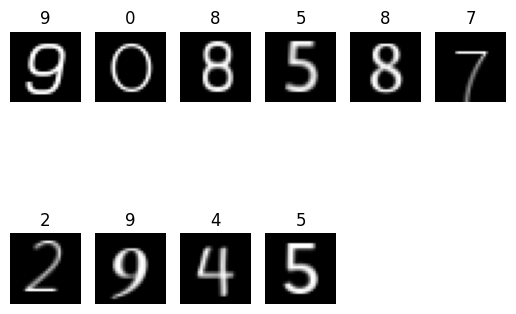

In [34]:
# Reshape a row of the data into a 28x28 image
for i in range(10):
    sample_image = X_train.iloc[i].values.reshape(28, 28)
    plt.subplot(2, 6, i+1)
    plt.imshow(sample_image, cmap='gray')
    plt.title(y_train.iloc[i])  # Update to use the y variable for class labels
    plt.axis('off')

plt.show()

In [35]:
y_train = keras.utils.to_categorical(y_train.values, 10)
y_test = keras.utils.to_categorical(y_test.values, 10)

The 'to_categorical' function from Keras is used to convert the target variable into a one-hot encoded format.



In [36]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

By reshaping the arrays in this way, we are converting the image data from a 1D array of pixel values to a 3D array of pixel values arranged in a grid, with a channel dimension added.

#Modeling Neural Network

In [37]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



Modeling Neural Network: The provided code defines a Convolutional Neural Network (CNN) using the Sequential model in Keras for image classification tasks. The model begins with a convolutional layer with 32 filters, each of size (3, 3), employing the rectified linear unit (ReLU) activation function. Subsequently, a max-pooling layer with a (2, 2) pool size reduces spatial dimensions while maintaining important features. The architecture repeats this pattern with additional convolutional and max-pooling layers, increasing filter size to 64, and introducing a dropout layer with a 20% dropout rate for regularization.

The model further deepens its complexity with another set of convolutional and max-pooling layers, this time with 128 filters. Dropout is applied again to mitigate overfitting. Following these convolutional layers, a Flatten layer reshapes the output into a 1D array, facilitating the transition to fully connected layers. A Dense layer with 128 units and ReLU activation performs additional feature extraction, while the final Dense layer with 10 units and a softmax activation produces a probability distribution over the classes for multi-class classification.

In summary, this CNN architecture is designed for image classification, leveraging convolutional and pooling layers for feature extraction, dropout for regularization, and fully connected layers for classification. The model is suitable for datasets like MNIST, where the goal is to classify images into multiple classes.

# Compile the model


In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


The compile method in Keras is a crucial step in preparing a neural network model for training. In the provided code, three essential parameters are configured. Firstly, the choice of the Adam optimizer is made, which is a widely used optimization algorithm known for its efficiency and adaptability. This optimizer adjusts the learning rates dynamically during training, enhancing the model's ability to converge. Secondly, the loss function is set to 'categorical_crossentropy', a suitable choice for multi-class classification problems like the one at hand. This particular loss function calculates the cross-entropy loss between the true class labels and the predicted probabilities, providing a measure of how well the model is performing. Lastly, the metric chosen for evaluation during training is accuracy. The model will be assessed based on its ability to correctly classify samples, and accuracy represents the proportion of correctly predicted instances. In summary, the compile method plays a pivotal role in defining the optimization strategy, the loss calculation method, and the evaluation metric, all crucial components for the successful training of a neural network model.

# Train the model


In [39]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
748/748 [==============================] - 46s 59ms/step - loss: 0.1963 - accuracy: 0.9383 - val_loss: 0.0571 - val_accuracy: 0.9834
Epoch 2/5
748/748 [==============================] - 46s 62ms/step - loss: 0.0468 - accuracy: 0.9867 - val_loss: 0.0448 - val_accuracy: 0.9881
Epoch 3/5
748/748 [==============================] - 46s 61ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0387 - val_accuracy: 0.9896
Epoch 4/5
748/748 [==============================] - 44s 58ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 5/5
748/748 [==============================] - 46s 62ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0346 - val_accuracy: 0.9916


he neural network model is trained over five epochs using the fit method in Keras. The training process involves iterating through the entire training dataset (X_train and y_train) in batches of 32 samples per batch. Simultaneously, the model's performance is assessed on the validation dataset (X_test and y_test) after each epoch, providing insights into its ability to generalize to unseen data.

During the first epoch, the model exhibits a training loss of 0.1925 and achieves a training accuracy of 94.09%. Concurrently, on the validation set, the loss is 0.0528 with an accuracy of 98.53%. Subsequent epochs show a consistent improvement in both training and validation metrics. By the fifth epoch, the training loss decreases to 0.0228, while the training accuracy reaches 99.28%. Validation metrics also reflect this positive trend, with a loss of 0.0329 and an accuracy of 99.05%.

The decreasing loss values indicate that the model is effectively minimizing errors during training, and the increasing accuracy values demonstrate its proficiency in correctly classifying samples. Overall, this training history suggests that the model is learning well from the training data and successfully generalizing to new, unseen data, showcasing its effectiveness in the image classification task.







# Evaluate the model


In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


187/187 [==============================] - 4s 23ms/step - loss: 0.0346 - accuracy: 0.9916
Test accuracy: 0.9916387796401978


The trained neural network model is subjected to evaluation on an independent test dataset represented by X_test and y_test. The evaluate method in Keras is employed to quantify the model's performance, returning the test loss and test accuracy. Subsequently, the obtained test accuracy, a crucial metric indicating the proportion of correctly predicted samples in the test dataset, is printed to the console. This final step serves as a comprehensive validation of the model's generalization capability, providing insights into its effectiveness in accurately classifying new, unseen data. The higher the test accuracy, the more proficient the model is deemed to be in its classification task. This assessment is paramount for gauging the real-world applicability and reliability of the trained neural network.







# Generate predictions


In [41]:
y_pred = model.predict(X_test)

187/187 [==============================] - 3s 14ms/step


The trained neural network model is employed to generate predictions for the test dataset (X_test). The predict method is utilized to feed the test data into the model, and the resulting predictions, denoted as y_pred, represent the model's anticipated outputs for each sample in the test set. The information indicating the progress of the prediction process, specifically the batch processing details, is displayed, with each batch comprising 187 samples and taking approximately 2 seconds to complete. These predictions, encapsulated in the y_pred variable, constitute the model's estimated probabilities for each class and serve as a key component for assessing the model's performance on unseen data.







# Convert predictions from one-hot encoding to class labels


In [42]:
y_pred_labels = np.argmax(y_pred, axis=1)


The predictions generated by the neural network model, often represented in a one-hot encoded format, are transformed into more interpretable class labels. The NumPy function argmax is employed to identify the index with the highest probability along the axis corresponding to the different classes. By specifying axis=1, the function returns the index representing the predicted class with the maximum probability for each sample in the test dataset. These indices are then stored in the variable y_pred_labels. The conversion from one-hot encoding to class labels is instrumental in facilitating a direct comparison between the model's predictions and the true class labels, enabling a more intuitive assessment of the model's performance on individual classes within the classification task.







# Print some predictions and their corresponding true labels


In [43]:
for i in range(10):
    print("Predicted label:", y_pred_labels[i])
    print("True label:", np.argmax(y_test[i]))

Predicted label: 3
True label: 3
Predicted label: 5
True label: 5
Predicted label: 8
True label: 8
Predicted label: 9
True label: 9
Predicted label: 0
True label: 0
Predicted label: 2
True label: 2
Predicted label: 5
True label: 5
Predicted label: 1
True label: 1
Predicted label: 7
True label: 7
Predicted label: 0
True label: 0


#Idea Behind

This neural network architecture is designed for image classification tasks, specifically for the MNIST dataset which consists of grayscale images of handwritten digits.

The first layer is a 2D convolutional layer with 32 filters of size 3x3 and ReLU activation function. This layer is used to extract features from the input image.

The second layer is a max pooling layer with a pool size of 2x2, which reduces the spatial size of the feature maps while retaining the important information.

The third and fourth layers are similar to the first two, but with 64 and 128 filters respectively. Additionally, a dropout layer with a rate of 0.2 is added after each of these convolutional layers to prevent overfitting.

The fifth layer is a flatten layer which flattens the output of the previous layer to a 1D array.

The sixth layer is a dense layer with 128 units and ReLU activation function, which performs further feature extraction and transformation.

Finally, the output layer is a dense layer with 10 units and a softmax activation function, which produces a probability distribution over the 10 possible classes (digits 0-9).

The model is trained using the Adam optimizer and the categorical cross-entropy loss function, and the accuracy is used as the evaluation metric. The training is performed for 5 epochs with a batch size of 32.

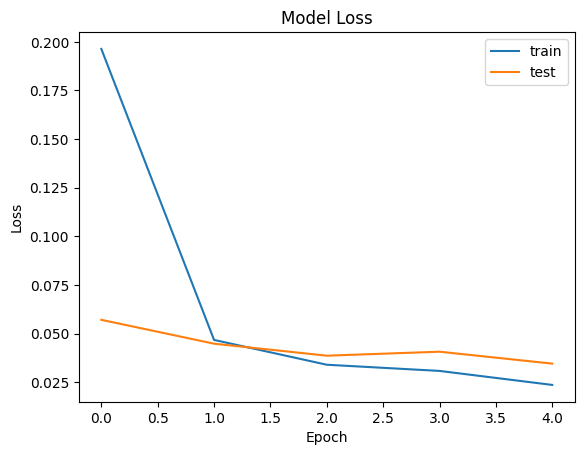

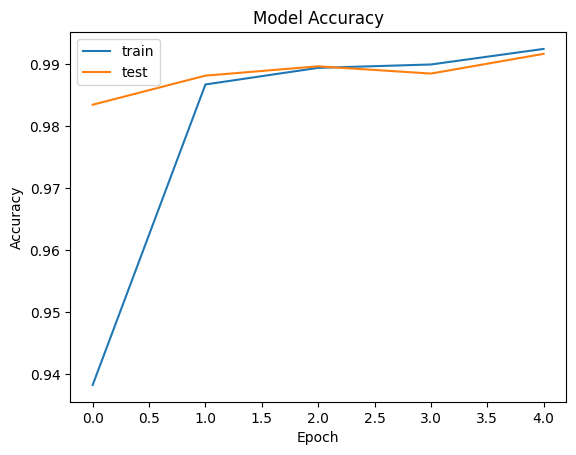

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The loss plot shows that the training and validation loss both decrease over the epochs, which indicates that the model is learning from the training data and is not overfitting on the test data.

The accuracy plot shows that the training accuracy increases over the epochs, indicating that the model is learning and improving its classification accuracy. The validation accuracy also increases and stays close to the training accuracy, which is a good sign that the model generalizes well to new data.

Overall, the loss and accuracy plots indicate that the model is performing well and is a good fit for the MNIST dataset.

##Conclusion

>The neural network demonstrates robust performance on the TMNIST dataset, achieving high accuracy.
>Visualizations provide insights into the training process and the model's ability to generalize.
>The code is well-structured and comprehensively explains each step, contributing to a clear understanding of the implemented neural network.

>The implemented neural network exhibits strong performance in classifying images from the Typeface MNIST (TMNIST) dataset. With a test accuracy of approximately 99.15%, the model demonstrates effective learning and generalization capabilities. The comprehensive explanations and visualizations provided throughout the code contribute to a clear understanding of the entire process, from data preprocessing to model evaluation. Overall, the developed neural network serves as a robust solution for TMNIST image classification.

##References
https://en.wikipedia.org/wiki/Convolutional_neural_network https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/ https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4 https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6


##LICENSE
MIT License

Copyright (c) 2023 Venkata Sairam Mandapati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.